# Spam Corpus Classification Based on TF-IDF

## Read Spam Corpus

In [1]:
import sys
sys.path.append('..')

from spam_corpus import read_spam_corpus
spam_corpus = read_spam_corpus()
spam_corpus.dropna(inplace = True)
spam_corpus.head()

,text,label
0,\n> From: fork-admin@xent.com [mailto:fork-adm...,0
1,"Hi,\n\nOn Sun, 01 Sep 2002 00:05:03 MDT Reg Cl...",0
2,"On Fri Sep 13 2002 at 02:03, Robert Elz wrote:...",0
3,"On Thu, 2002-08-29 at 01:06, Matthias Saou wro...",0
4,"Hi, I'm building an rpm for the resin webserve...",0


## Feature Mining

In [2]:
from sklearn.model_selection import train_test_split

train_corpus, test_corpus = train_test_split(spam_corpus, random_state=42)

In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()

train_X = vectorizer.fit_transform(train_corpus.text)
train_y = train_corpus.label

In [4]:
test_X = vectorizer.transform(test_corpus.text)
test_y = test_corpus.label

## Classification

### Random Forest

In [5]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(train_X, train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

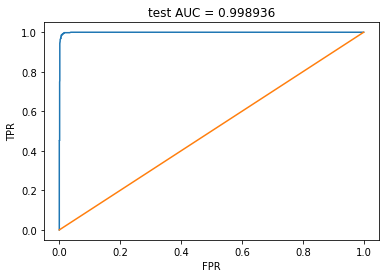

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import roc_auc_score, roc_curve

test_predict_proba = clf.predict_proba(test_X)
test_predict_proba_pos = test_predict_proba[:, 1]
auc = roc_auc_score(test_y, test_predict_proba_pos)
curve = roc_curve(test_y, test_predict_proba_pos)


plt.plot(curve[0], curve[1]);
plt.plot([0,1], [0,1])
plt.xlabel('FPR'); plt.ylabel('TPR'); plt.title('test AUC = %f' % (auc)); plt.axis([-0.05,1.05,-0.05,1.05]);

In [7]:
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.metrics import precision_score, recall_score, f1_score

to_labels = np.vectorize(lambda x: 1 if x > 0.5 else 0)
test_predict = to_labels(test_predict_proba_pos)

print('accuracy', accuracy_score(test_y, test_predict))
print('precision', precision_score(test_y, test_predict))
print('recall', recall_score(test_y, test_predict))
print('f1', f1_score(test_y, test_predict))
confusion_matrix(test_y, test_predict)

accuracy 0.9860482654600302
precision 0.9885057471264368
recall 0.9695603156708005
f1 0.9789413773477519


array([[1755,   10],
       [  27,  860]], dtype=int64)